# California Housing Prices

[Sumber data California Housing Prices](https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Exploratory Data Analysis
5. Modeling
6. Conclusion
7. Recommendation

****

# Business Problem Understanding

**Context** 

Perumahan merupakan kebutuhan pokok semua manusia, semua orang di dunia ingin mempunyai rumah yang nyaman untuk ditinggali. Pertumbuhan penduduk yang semakin meningkat membuat permintaan untuk perumahan semakin meningkat pula. Seperti halnya di salah satu negara bagian di Amerika Serikat, California. Banyaknya penduduk di sini membuka kesempatan yang besar bagi para developer perumahan untuk menyediakan rumah yang dapat menghasilkan keuntungan untuk mereka, tetapi para developer tentunya tidak ingin membuat suatu rumah dengan harga dan value yang kurang tepat yang dapat menyebabkan kurang maksimalnya profit. Banyak faktor yang dapat menentukan harga rumah yang cocok untuk dijual oleh developer, seperti lokasi, detail, dan fitur-fitur yang terdapat pada rumah tersebut. Oleh karena itu, jika ingin menjadi developer perumahan tentu harus tau berapa harga yang dapat ditawarkan dengan fitur-fitur yang ada di rumah tersebut dan dimana lokasi rumah tersebut berada.

**Problem Statement**

Problem terbesar bagi developer perumahan adalah menentukan harga yang cocok untuk suatu rumah agar rumah tersebut dapat dijual dengan profit yang maksimal. Perumahan yang sudah ada serta persaingan dengan developer lain membuat developer perumahan harus dapat membuat suatu rumah dengan spesifikasi serta lokasi yang tepat dan menjualnya dengan harga yang tepat untuk dapat bersaing.

**Goals**

Berdasarkan permasalah tersebut, developer perlu memiliki 'tool' yang dapat memprediksi dan membantu mereka dalam menentukan harga jual suatu rumah yang tepat. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu rumah, seperti jumlah kamar, jumlah kamar tidur, dan lokasi dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit yang maksimal bagi developer dan harga yang sesuai untuk pembeli.

**Analytic Approach**

Jadi, yang perlu saya lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu perumahan dengan yang lainnya. 

Selanjutnya, saya akan membangun suatu model regresi yang akan membantu developer untuk dapat menyediakan 'tool' prediksi harga jual suatu rumah yang akan mereka bangun, yang mana akan berguna untuk developer dalam membangun rumah dengan modal yang sesuai.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga jual sesuai dengan limitasi fitur yang digunakan. 

# Data Understanding

- Dataset diambil dari data sensus perumahan di negara bagian California pada tahun 1990.
- Setiap baris data merepresentasikan informasi terkait perumahan di tiap blok dan populasinya.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | float64 | titik koordinat garis bujur |
| latitude | float64  | titik koordinat garis lintang |
| housing_median_age | float64 | nilai tengah umur rumah per blok |
| total_rooms | float64 | jumlah kamar/ruangan per blok |
| total_bedrooms | float64 | jumlah kamar tidur per blok |
| population | float64 | jumlah populasi per blok |
| households | float64 | jumlah rumah tangga per blok |
| median_income | float64 | nilai tengah pendapatan per blok (dihitung dalam 10.000 US Dollars) |
| ocean_proximity | object | jarak perumahan dari laut |
| median_house_value | float64 | nilai tengah harga/value perumahan per blok (dihitung dalam US Dollar) |

<br>

**Import Library**

In [3]:
# Data Exploration
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Splitting data
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

# Metric
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

# Tuning
from jcopml.tuning import grid_search_params as gsp

# Evaluation Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

**Load Dataset**

In [5]:
df = pd.read_csv('data_california_house.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


Dari info di atas dapat dilihat bahwa hampir semua fitur merupakan numerikal, dan hanya ada satu fitur yang merupakan kategorikal. Fitur itu akan saya ubah nanti menjadi numerikal.

In [7]:
display(df.describe().round(1), df.describe(include='object'))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.0,14448.0,14448.0,14448.0,14311.0,14448.0,14448.0,14448.0,14448.0
mean,-119.6,35.6,28.6,2640.1,538.3,1425.2,499.5,3.9,206824.6
std,2.0,2.1,12.6,2191.6,423.6,1149.6,383.1,1.9,115365.5
min,-124.4,32.5,1.0,2.0,1.0,3.0,1.0,0.5,14999.0
25%,-121.8,33.9,18.0,1451.0,295.0,784.0,279.0,2.6,119600.0
50%,-118.5,34.3,29.0,2125.0,435.0,1165.0,410.0,3.5,180000.0
75%,-118.0,37.7,37.0,3148.0,647.0,1724.0,604.0,4.7,263900.0
max,-114.3,42.0,52.0,32627.0,6445.0,35682.0,6082.0,15.0,500001.0


,ocean_proximity
count,14448
unique,5
top,<1H OCEAN
freq,6369


Berikut info yang bisa kita dapat dari dataset di atas :
- Terdapat 14448 baris dan 10 kolom/fitur
- 9 kolom merupakan numerikal dan 1 kolom merupakan kategorikal
- Hanya 1 kolom yang mempunyai missing value / NaN, yaitu kolom `total_bedrooms`
- Ada outlier di beberapa kolom dalam dataset

# Exploratory Data Analysis

**Distribusi Data**

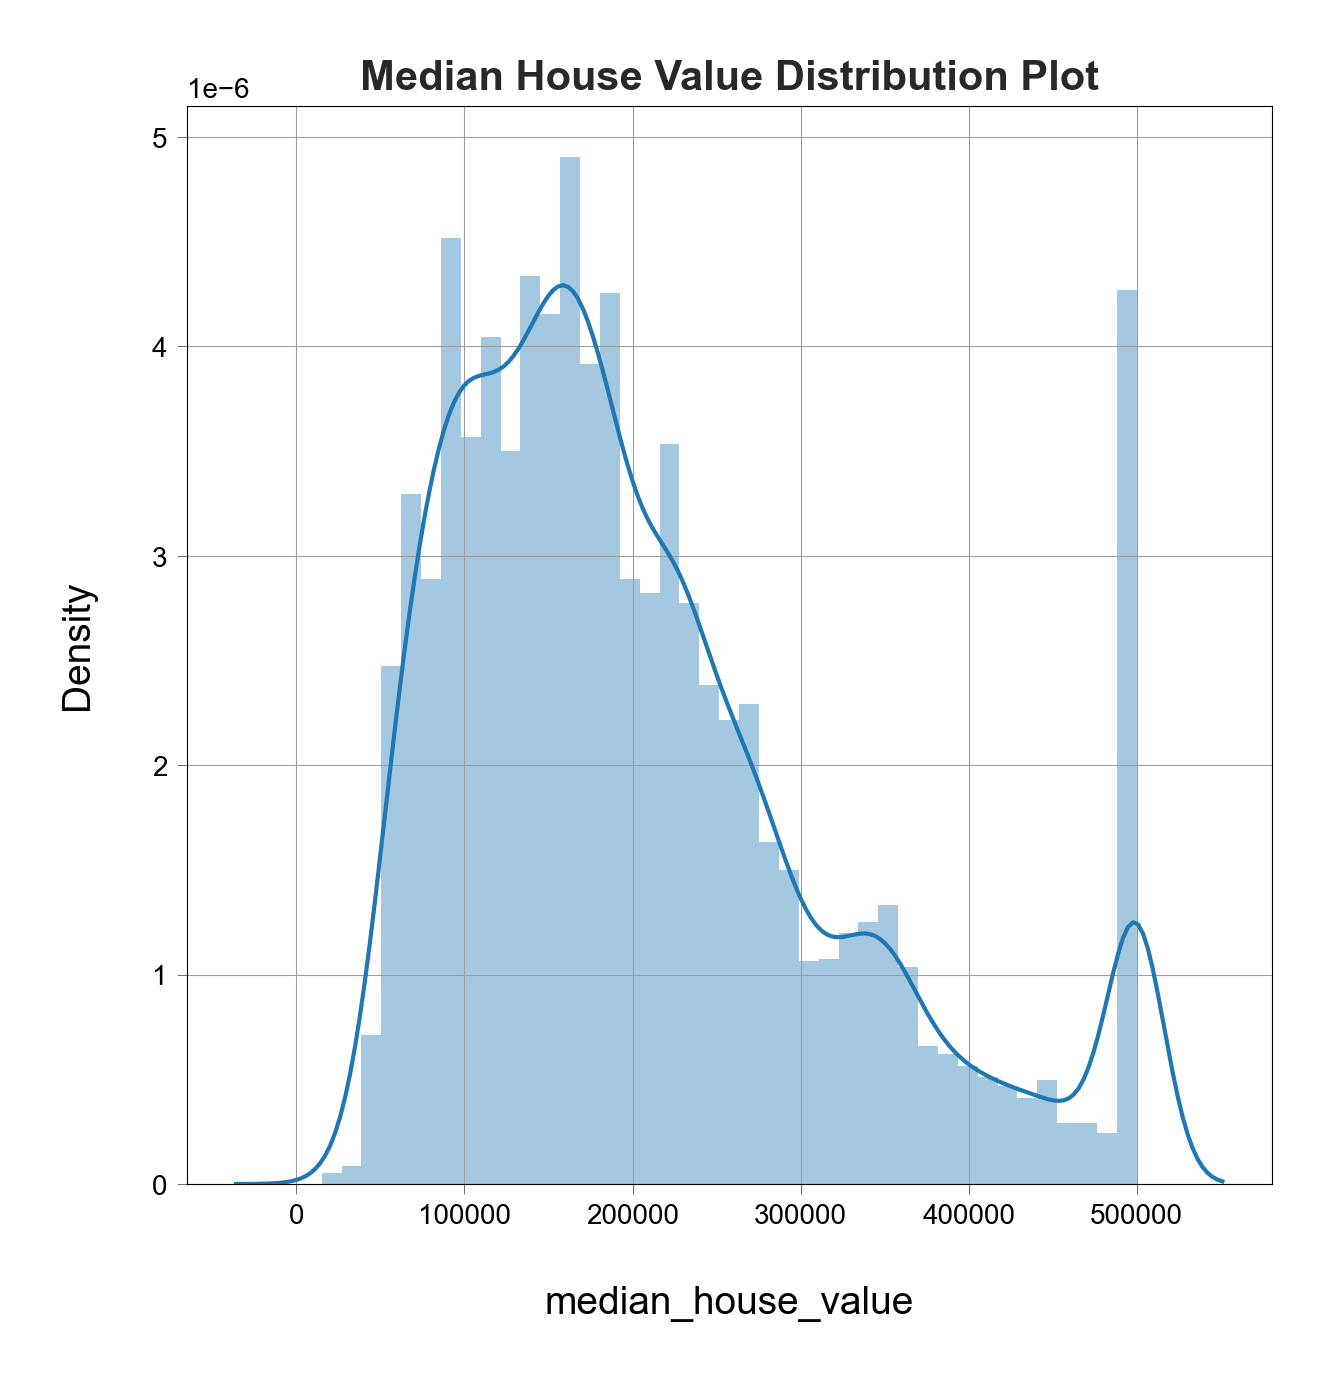

In [8]:
# Plot distribusi fitur 'median_house_value'
plt.figure(figsize=(7, 7))
sns.distplot(df['median_house_value'])
plt.title('Median House Value Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga median perumahan di atas, terlihat bahwa di plot cenderung terdapat 'right-skewed distribution' dan juga outlier. Dengan kata lain, terdapat skewness positif pada fitur price.

**Jumlah Perumahan Berdasarkan Lokasi**

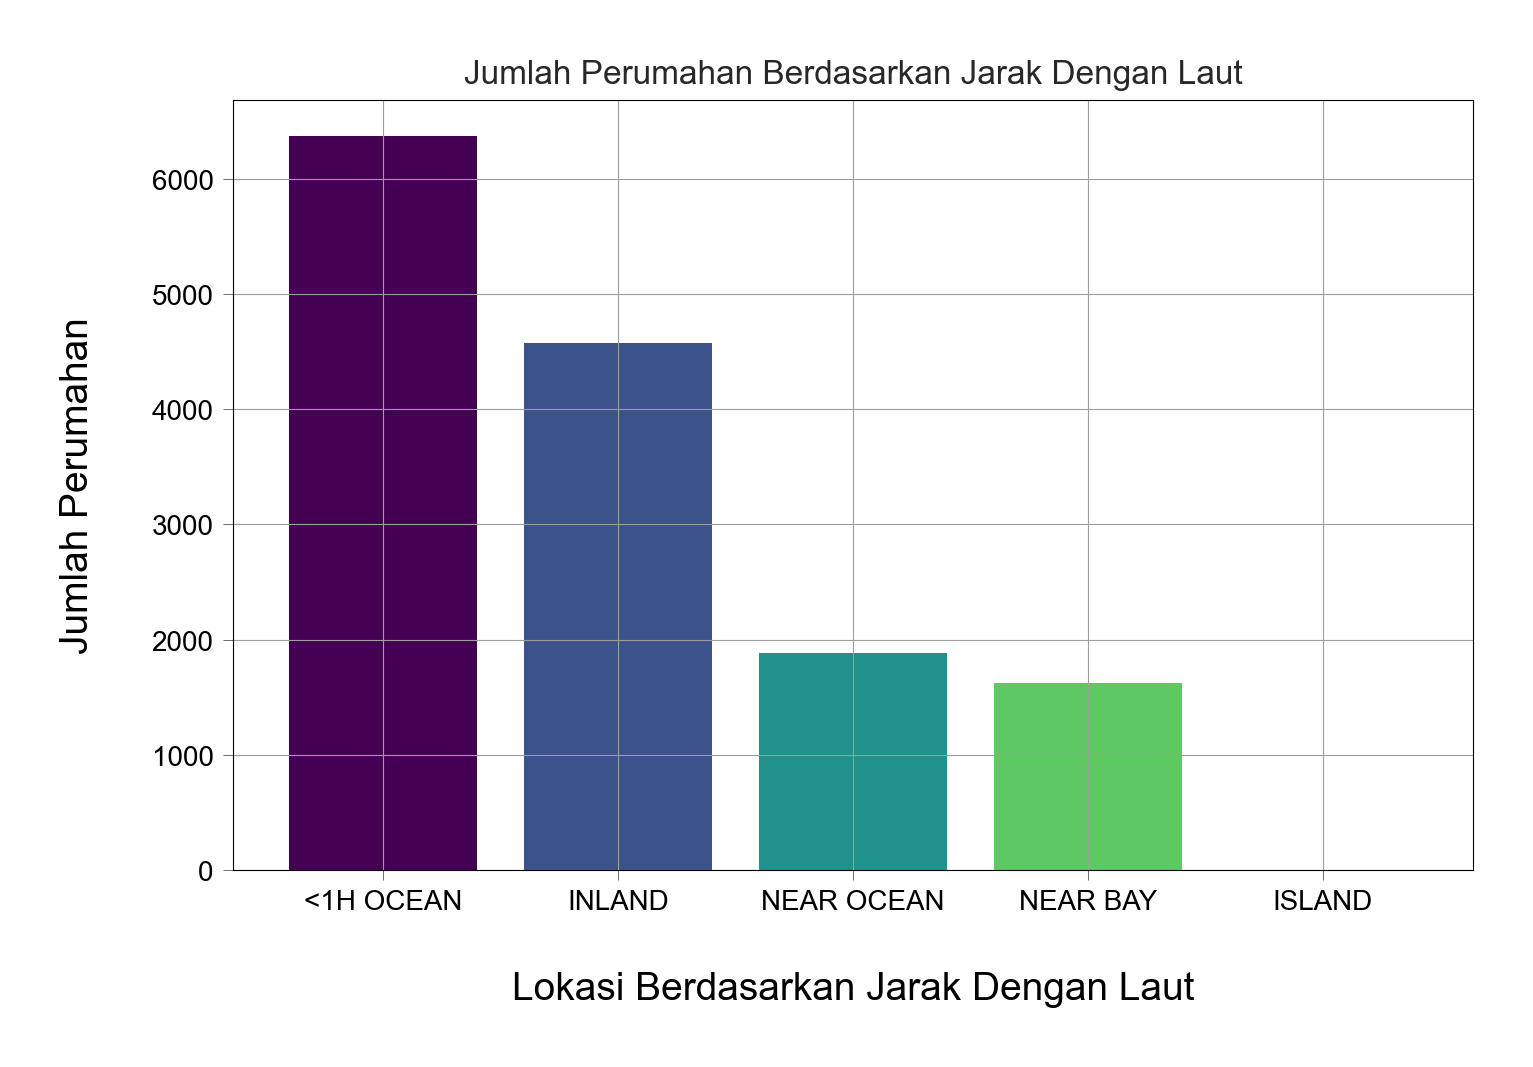

In [9]:
# Plot jumlah perumahan berdasarkan lokasi
import matplotlib.cm as cm

lokasi = df['ocean_proximity'].value_counts().to_dict()

categories = list(lokasi.keys())
values = list(lokasi.values())

colormap = cm.get_cmap('viridis')
colors = [colormap(i) for i in np.linspace(0, 1, len(categories))]
plt.bar(categories, values, color=colors)
plt.xlabel('Lokasi Berdasarkan Jarak Dengan Laut')
plt.ylabel('Jumlah Perumahan')
plt.title('Jumlah Perumahan Berdasarkan Jarak Dengan Laut')
plt.show()


Dari grafik di atas dapat dilihat bahwa kebanyakan perumahan berada di lokasi `<1H OCEAN` dan `INLAND`, sedangkan perumahan yang berada di lokasi `ISLAND` jumlahnya sangat sedikit. Dikarenakan luas tanah yang dapat dibangun rumah di sekitar laut maupun di dalam pulau terbatas, sedangkan daerah yang jauh dari laut mempunyai banyak lahan yang dapat dibangun rumah di atasnya.

**Data Geografis**

Text(0.5, 1.0, 'Persebaran Perumahan Berdasarkan Jarak Dengan Laut')

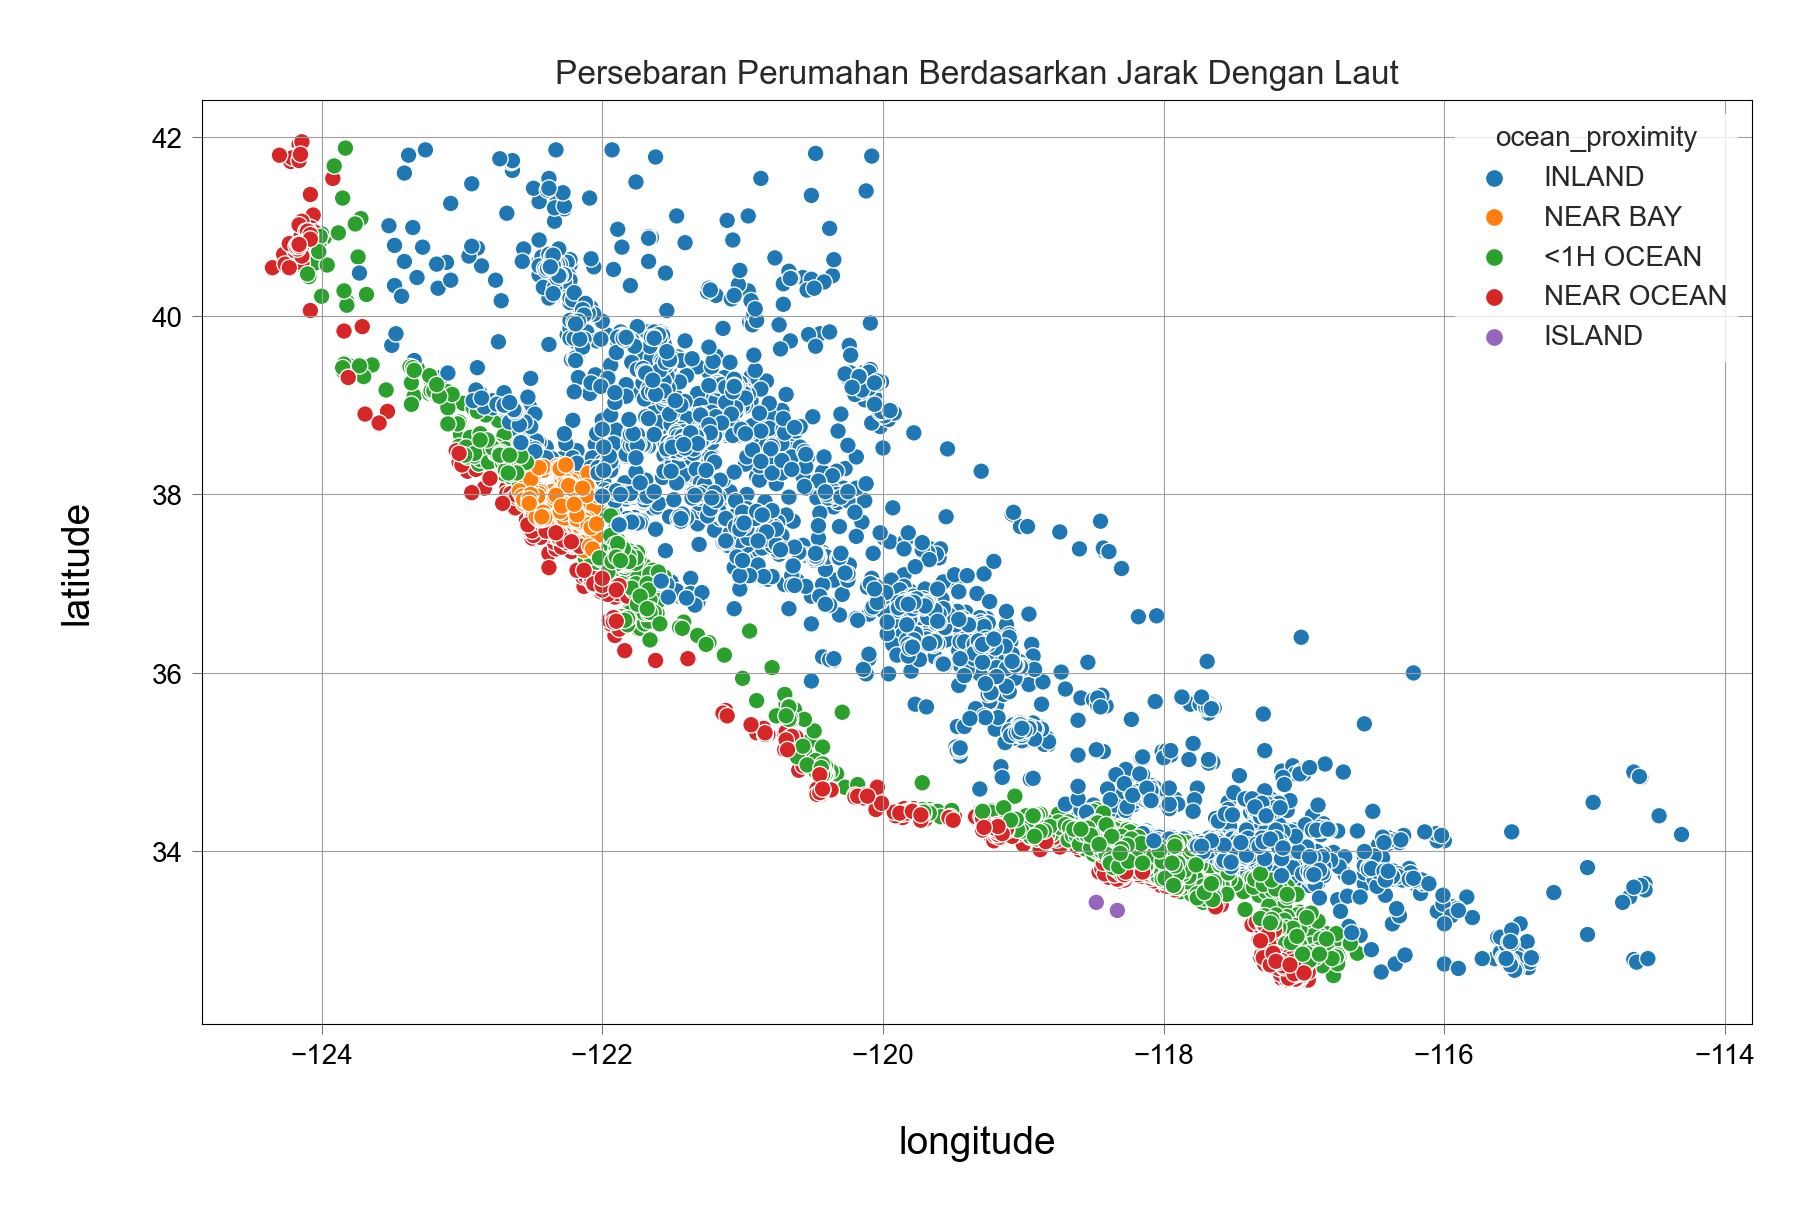

In [10]:
# Plot persebaran lokasi perumahan
plt.figure(figsize=(10, 6))
sns.scatterplot(df['longitude'], df['latitude'], hue=df['ocean_proximity']).set_title('Persebaran Perumahan Berdasarkan Jarak Dengan Laut')

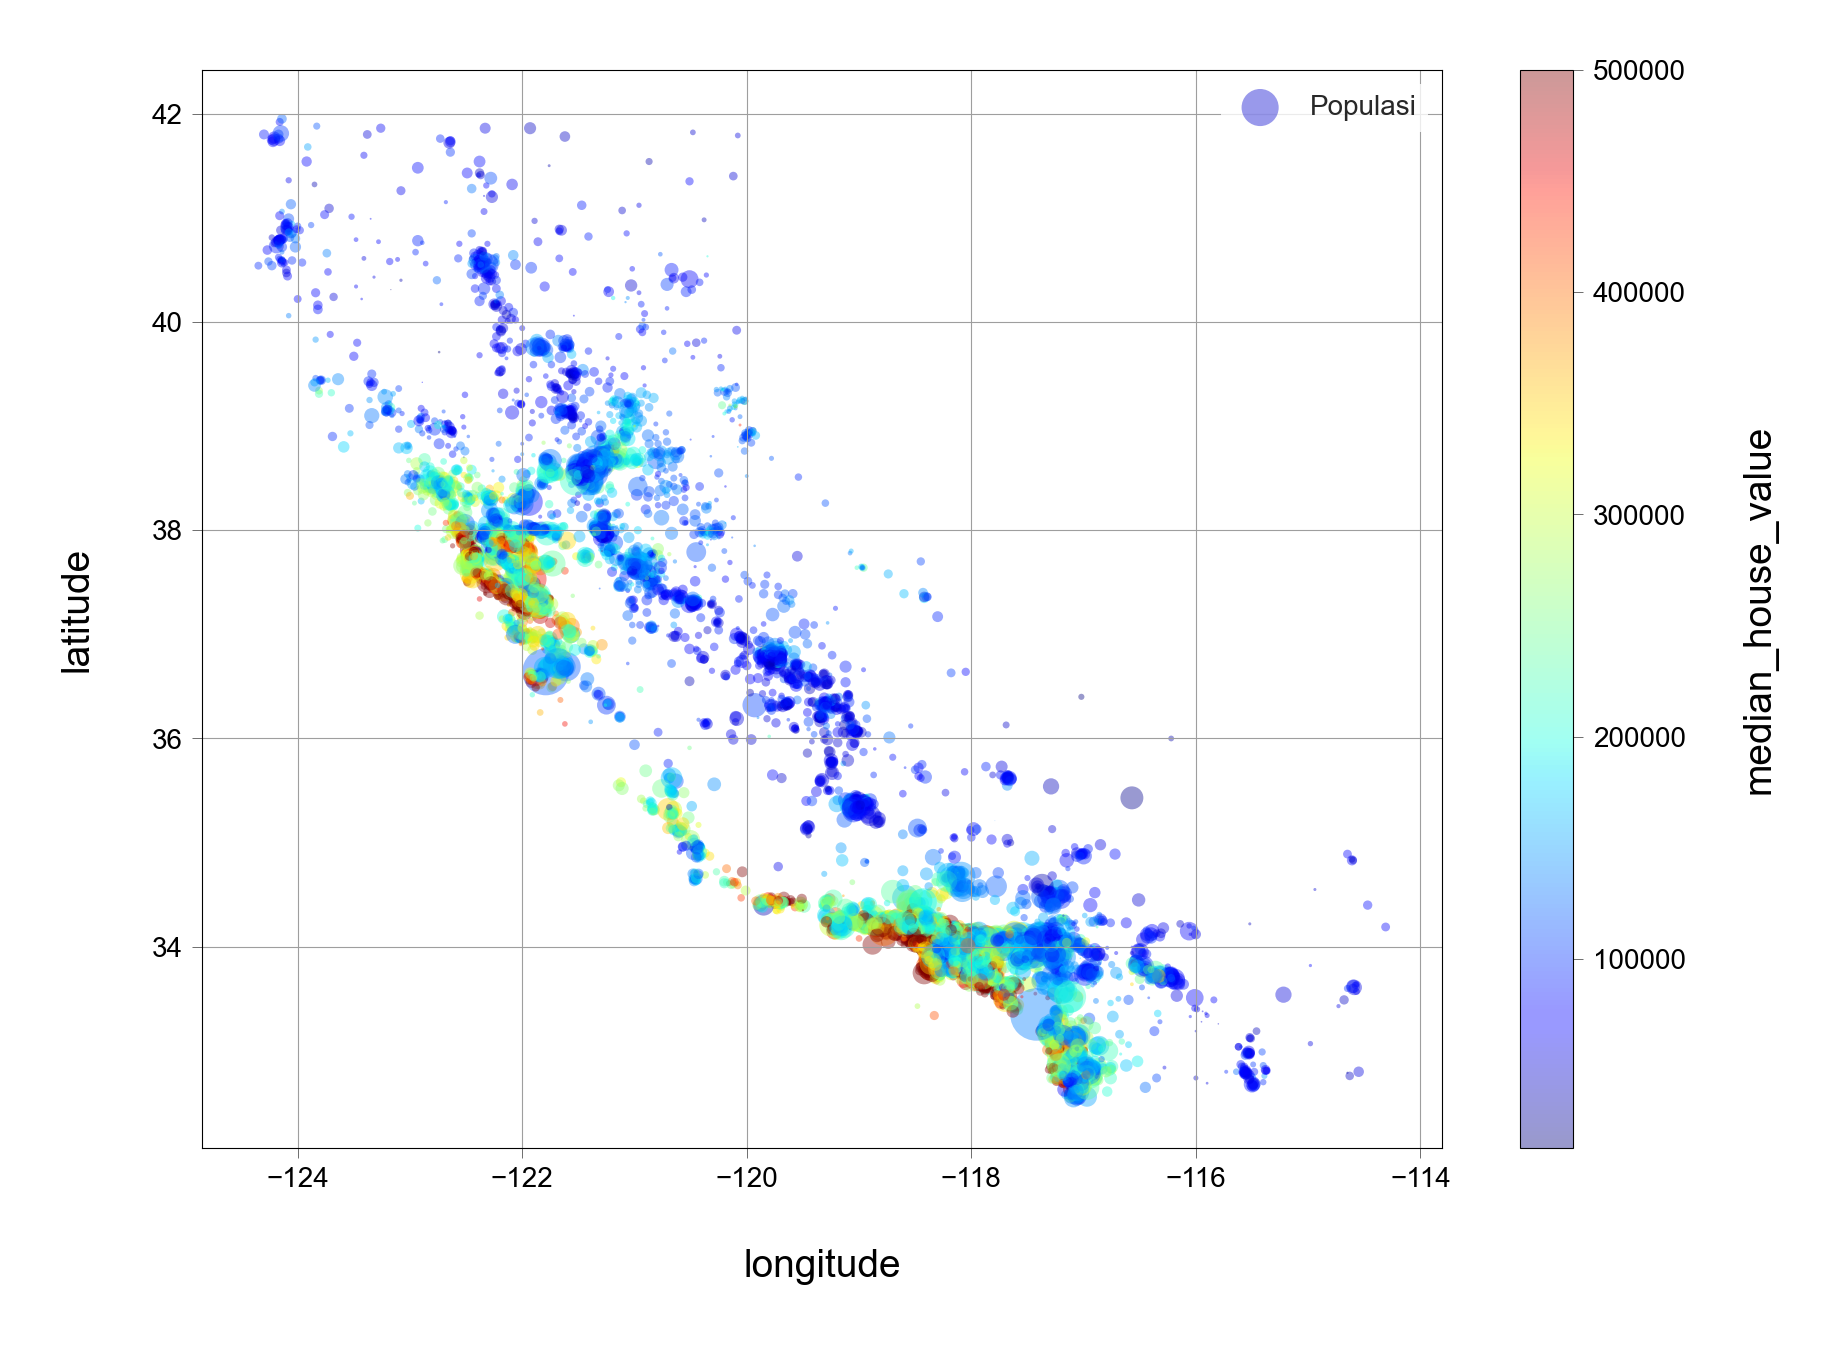

In [11]:
# Plot persebaran lokasi perumahan dengan harga & jumlah populasinya
df.plot(kind='scatter',
                x = 'longitude',
                y = 'latitude',
                alpha = 0.4, 
                s = df['population']/100, 
                label = 'Populasi', 
                figsize = (10,7), 
                c = 'median_house_value', 
                cmap = plt.get_cmap('jet'),
                colorbar = True, 
)
plt.legend()

Warna merepresentasikan harga : semakin merah semakin mahal, sebaliknya semakin biru semakin murah. Sedangkan besar kecilnya lingkaran merepresentasikan jumlah populasi : semakin besar lingkaran semakin banyak populasi, sebaliknya semakin kecil semakin sedikit populasi.

Dapat dilihat dari plot di atas persebaran populasi cukup merata di hampir semua lokasi, terdapat beberapa lokasi yang mempunyai populasi yang terlihat mempunyai populasi yang jauh lebih banyak. Untuk persebaran harga dapat dilihat harga perumahan semakin dekat dengan laut lebih mahal, sedangkan harga perumahan yang lebih jauh dari laut mempunyai harga yang relatif lebih murah.

# Preprocessing

Pada tahap ini, saya akan melakukan pengecekan dan cleaning pada data yang nantinya data yang sudah dibersihkan akan saya gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:

- Mengecek missing value, dan data duplikasi.
- Melakukan treatment terhadap missing value dan data duplikasi jika ada.
- Mengecek outlier dan merapihkan data yang mempunyai outlier.
- Membuat beberapa fitur baru, dan menghapus fitur-fitur yang tidak digunakan.

Untuk proses data preprocessing dan feature engineering, saya akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [12]:
# menduplikasi dataframe

dfc = df.copy()

In [13]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in dfc.columns:
    listItem.append([col, dfc[col].dtype, dfc[col].isna().sum(), round((dfc[col].isna().sum()/len(dfc[col]))*100, 2),
                    dfc[col].nunique(), list(dfc[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-114.61, -116.36]"
1,latitude,float64,0,0.00,836,"[34.86, 36.08]"
2,housing_median_age,float64,0,0.00,52,"[41.0, 38.0]"
3,total_rooms,float64,0,0.00,5227,"[2632.0, 3329.0]"
4,total_bedrooms,float64,137,0.95,1748,"[1716.0, 2437.0]"
5,population,float64,0,0.00,3498,"[500.0, 1471.0]"
6,households,float64,0,0.00,1649,"[119.0, 3073.0]"
7,median_income,float64,0,0.00,9797,"[8.289, 3.7738]"
8,ocean_proximity,object,0,0.00,5,"[ISLAND, NEAR OCEAN]"
9,median_house_value,float64,0,0.00,3548,"[269500.0, 321900.0]"


**Data Duplikat & Missing Value**

In [14]:
dfc.duplicated().sum()

0

In [15]:
dfc.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [16]:
dfc['total_bedrooms'].isna().sum()/df.shape[0]*100

0.9482281284606866

In [17]:
dfc.dropna(inplace=True)

Tidak ada data duplikat pada dataset, dan jumlah missing value yang ada pada fitur `total_bedrooms` hanya berjumlah 137, dan mempunyai persentase hanya sekitar 0.94% oleh karena itu akan saya drop saja missing valuenya.

**Data Correlation**

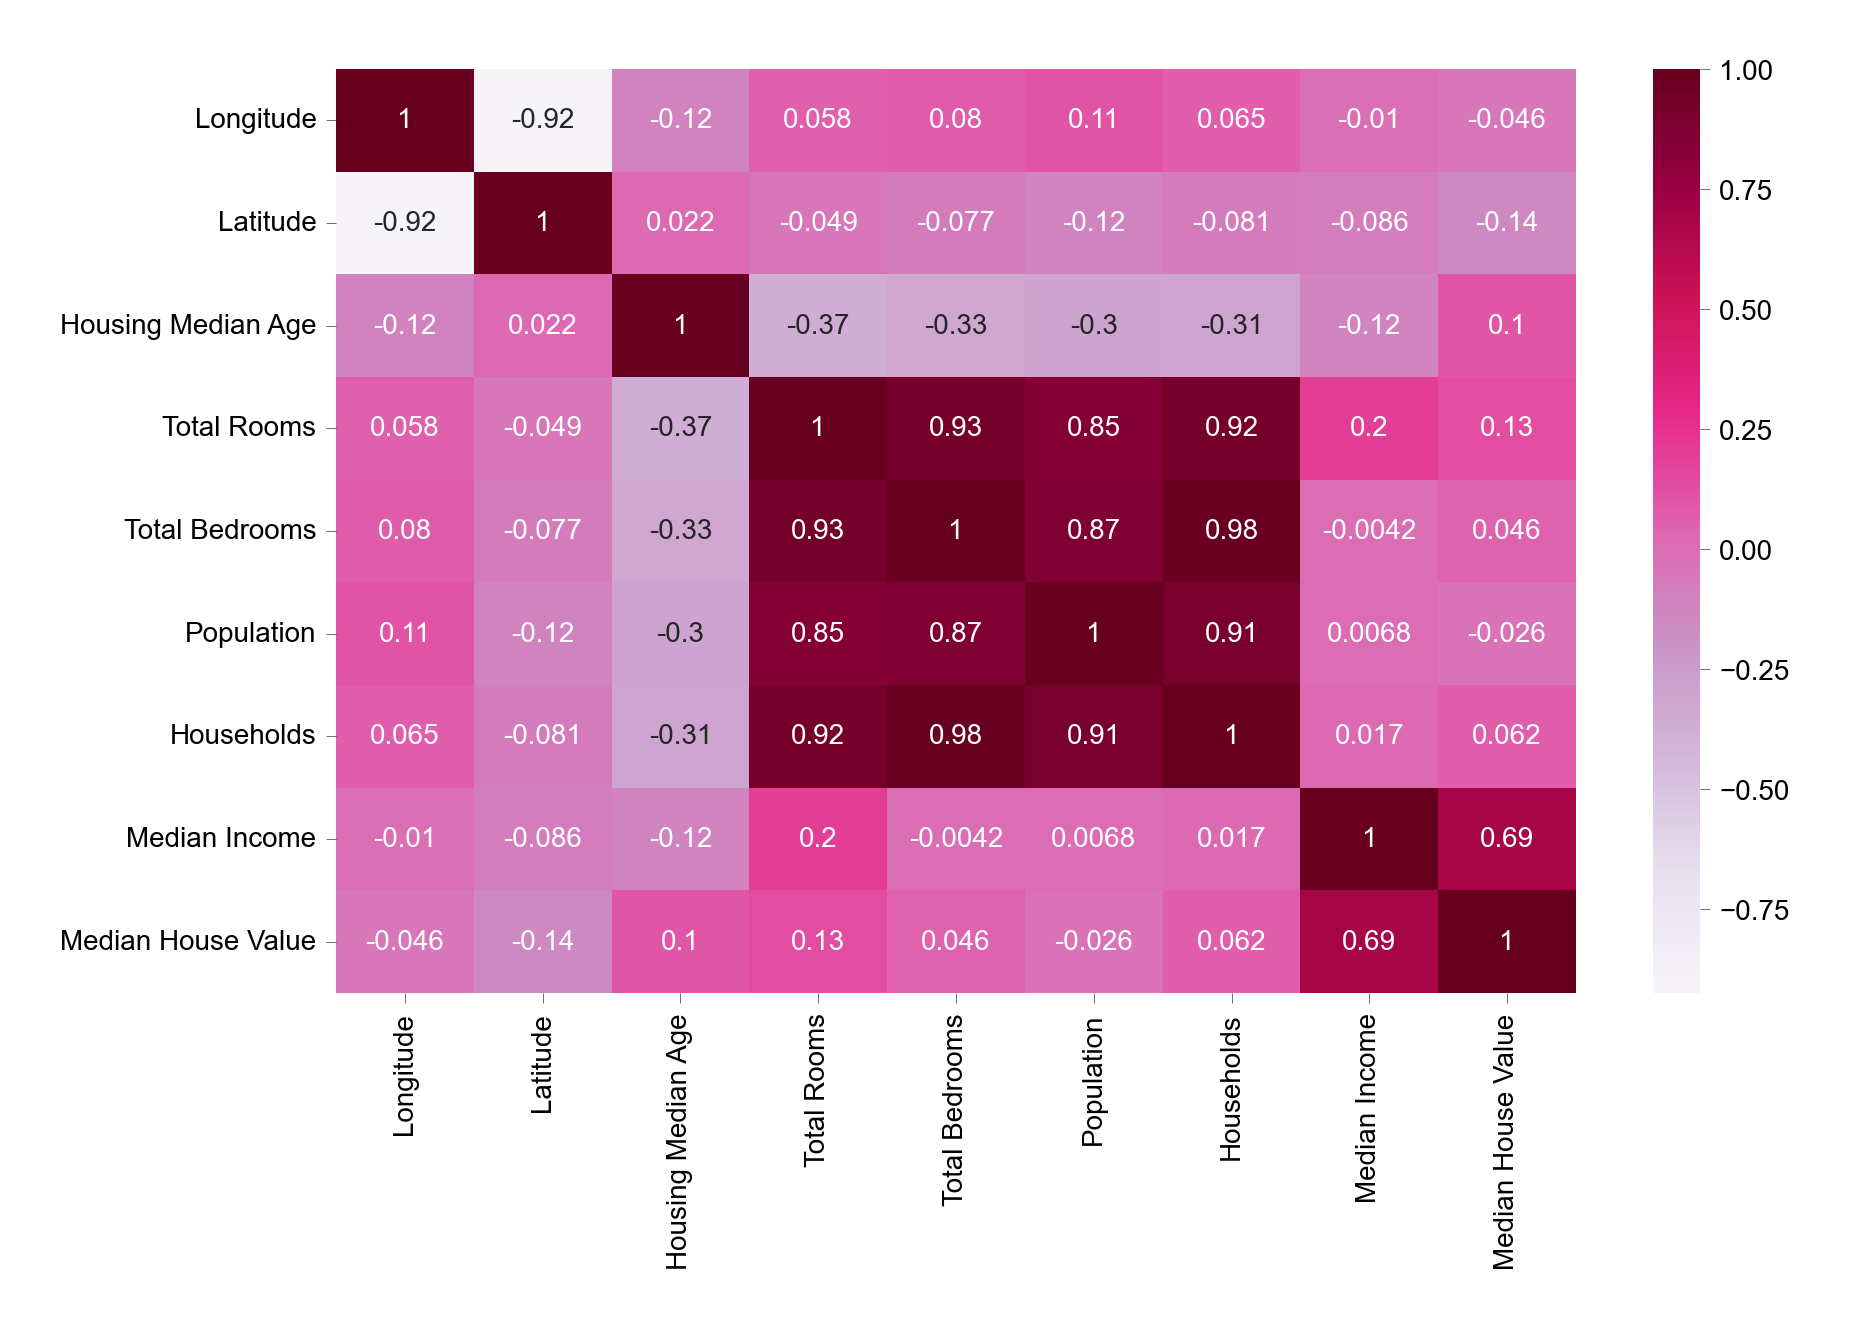

In [18]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(dfc.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
heat = sns.heatmap(dfc.corr(method ='pearson'), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap='PuRd', ax=ax)

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur median_house_value. Korelasi paling tinggi dimiliki oleh fitur 'median_income' yang mana korelasinya hanya sedang bukan kuat, yang memiliki korelasi positif. Masuk akal karena semakin tinggi pemasukan rumah tangga perumahan yang ada di suatu blok, semakin tinggi pula harga perumahan di blok tersebut.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan.

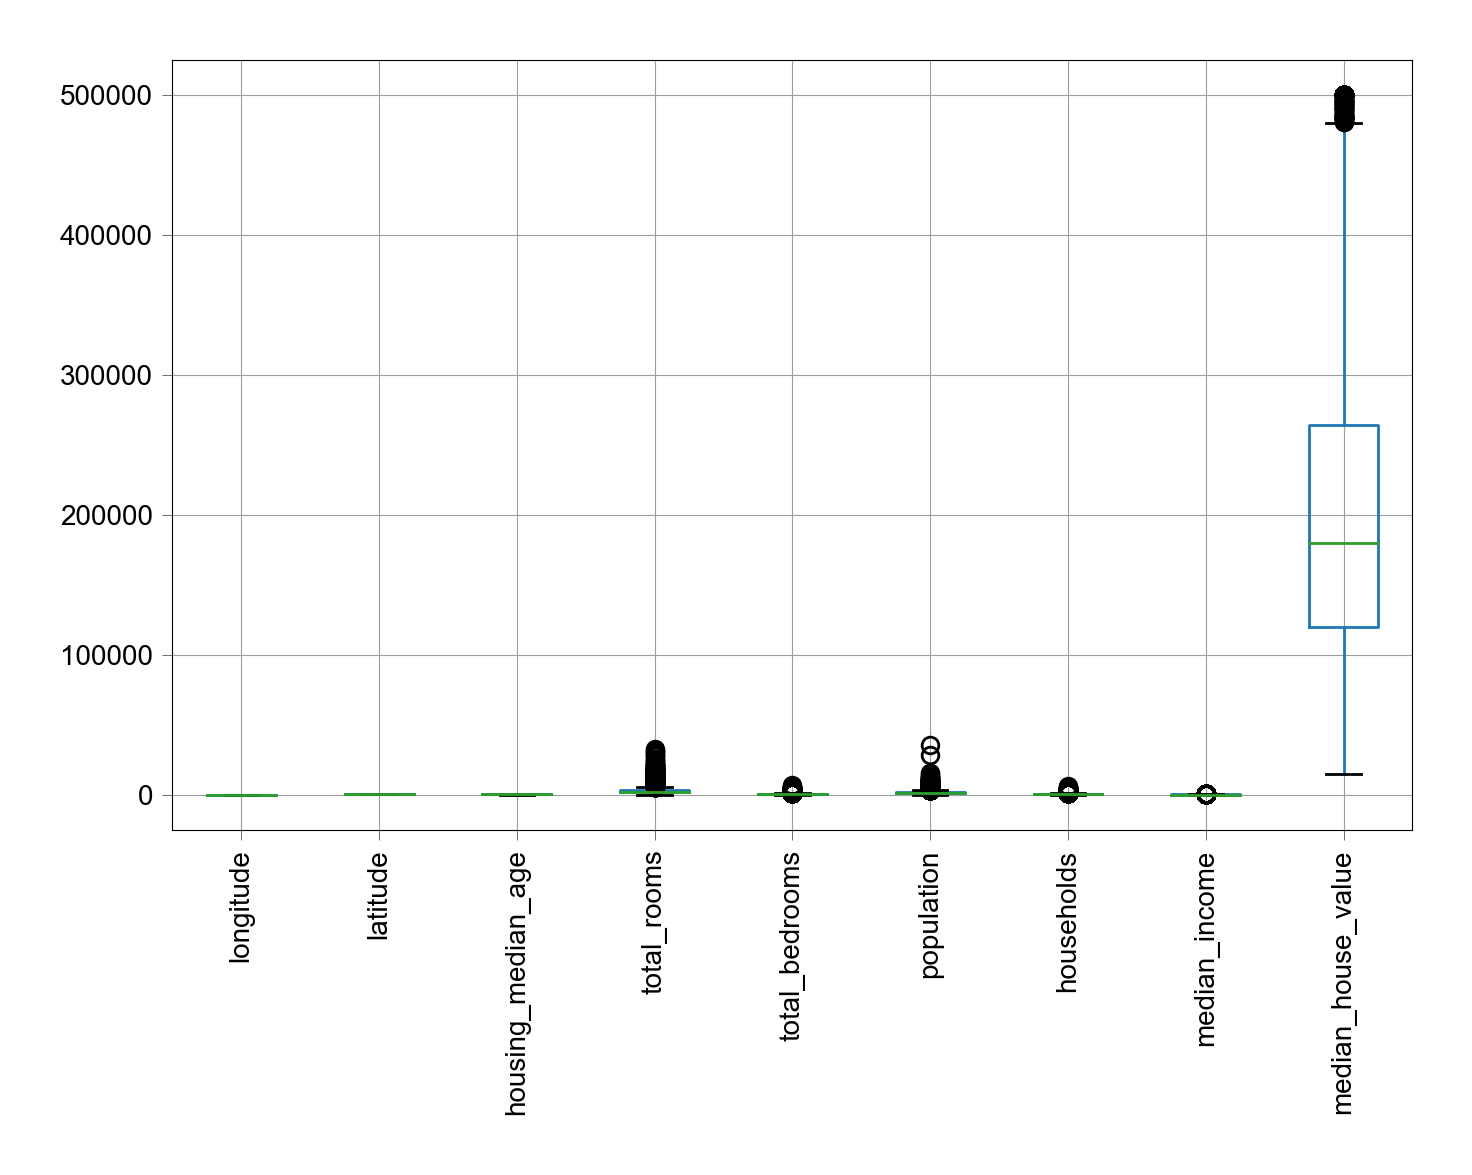

In [19]:
# Plot boxplot untuk mengecek outliers
dfc.boxplot(rot=90);

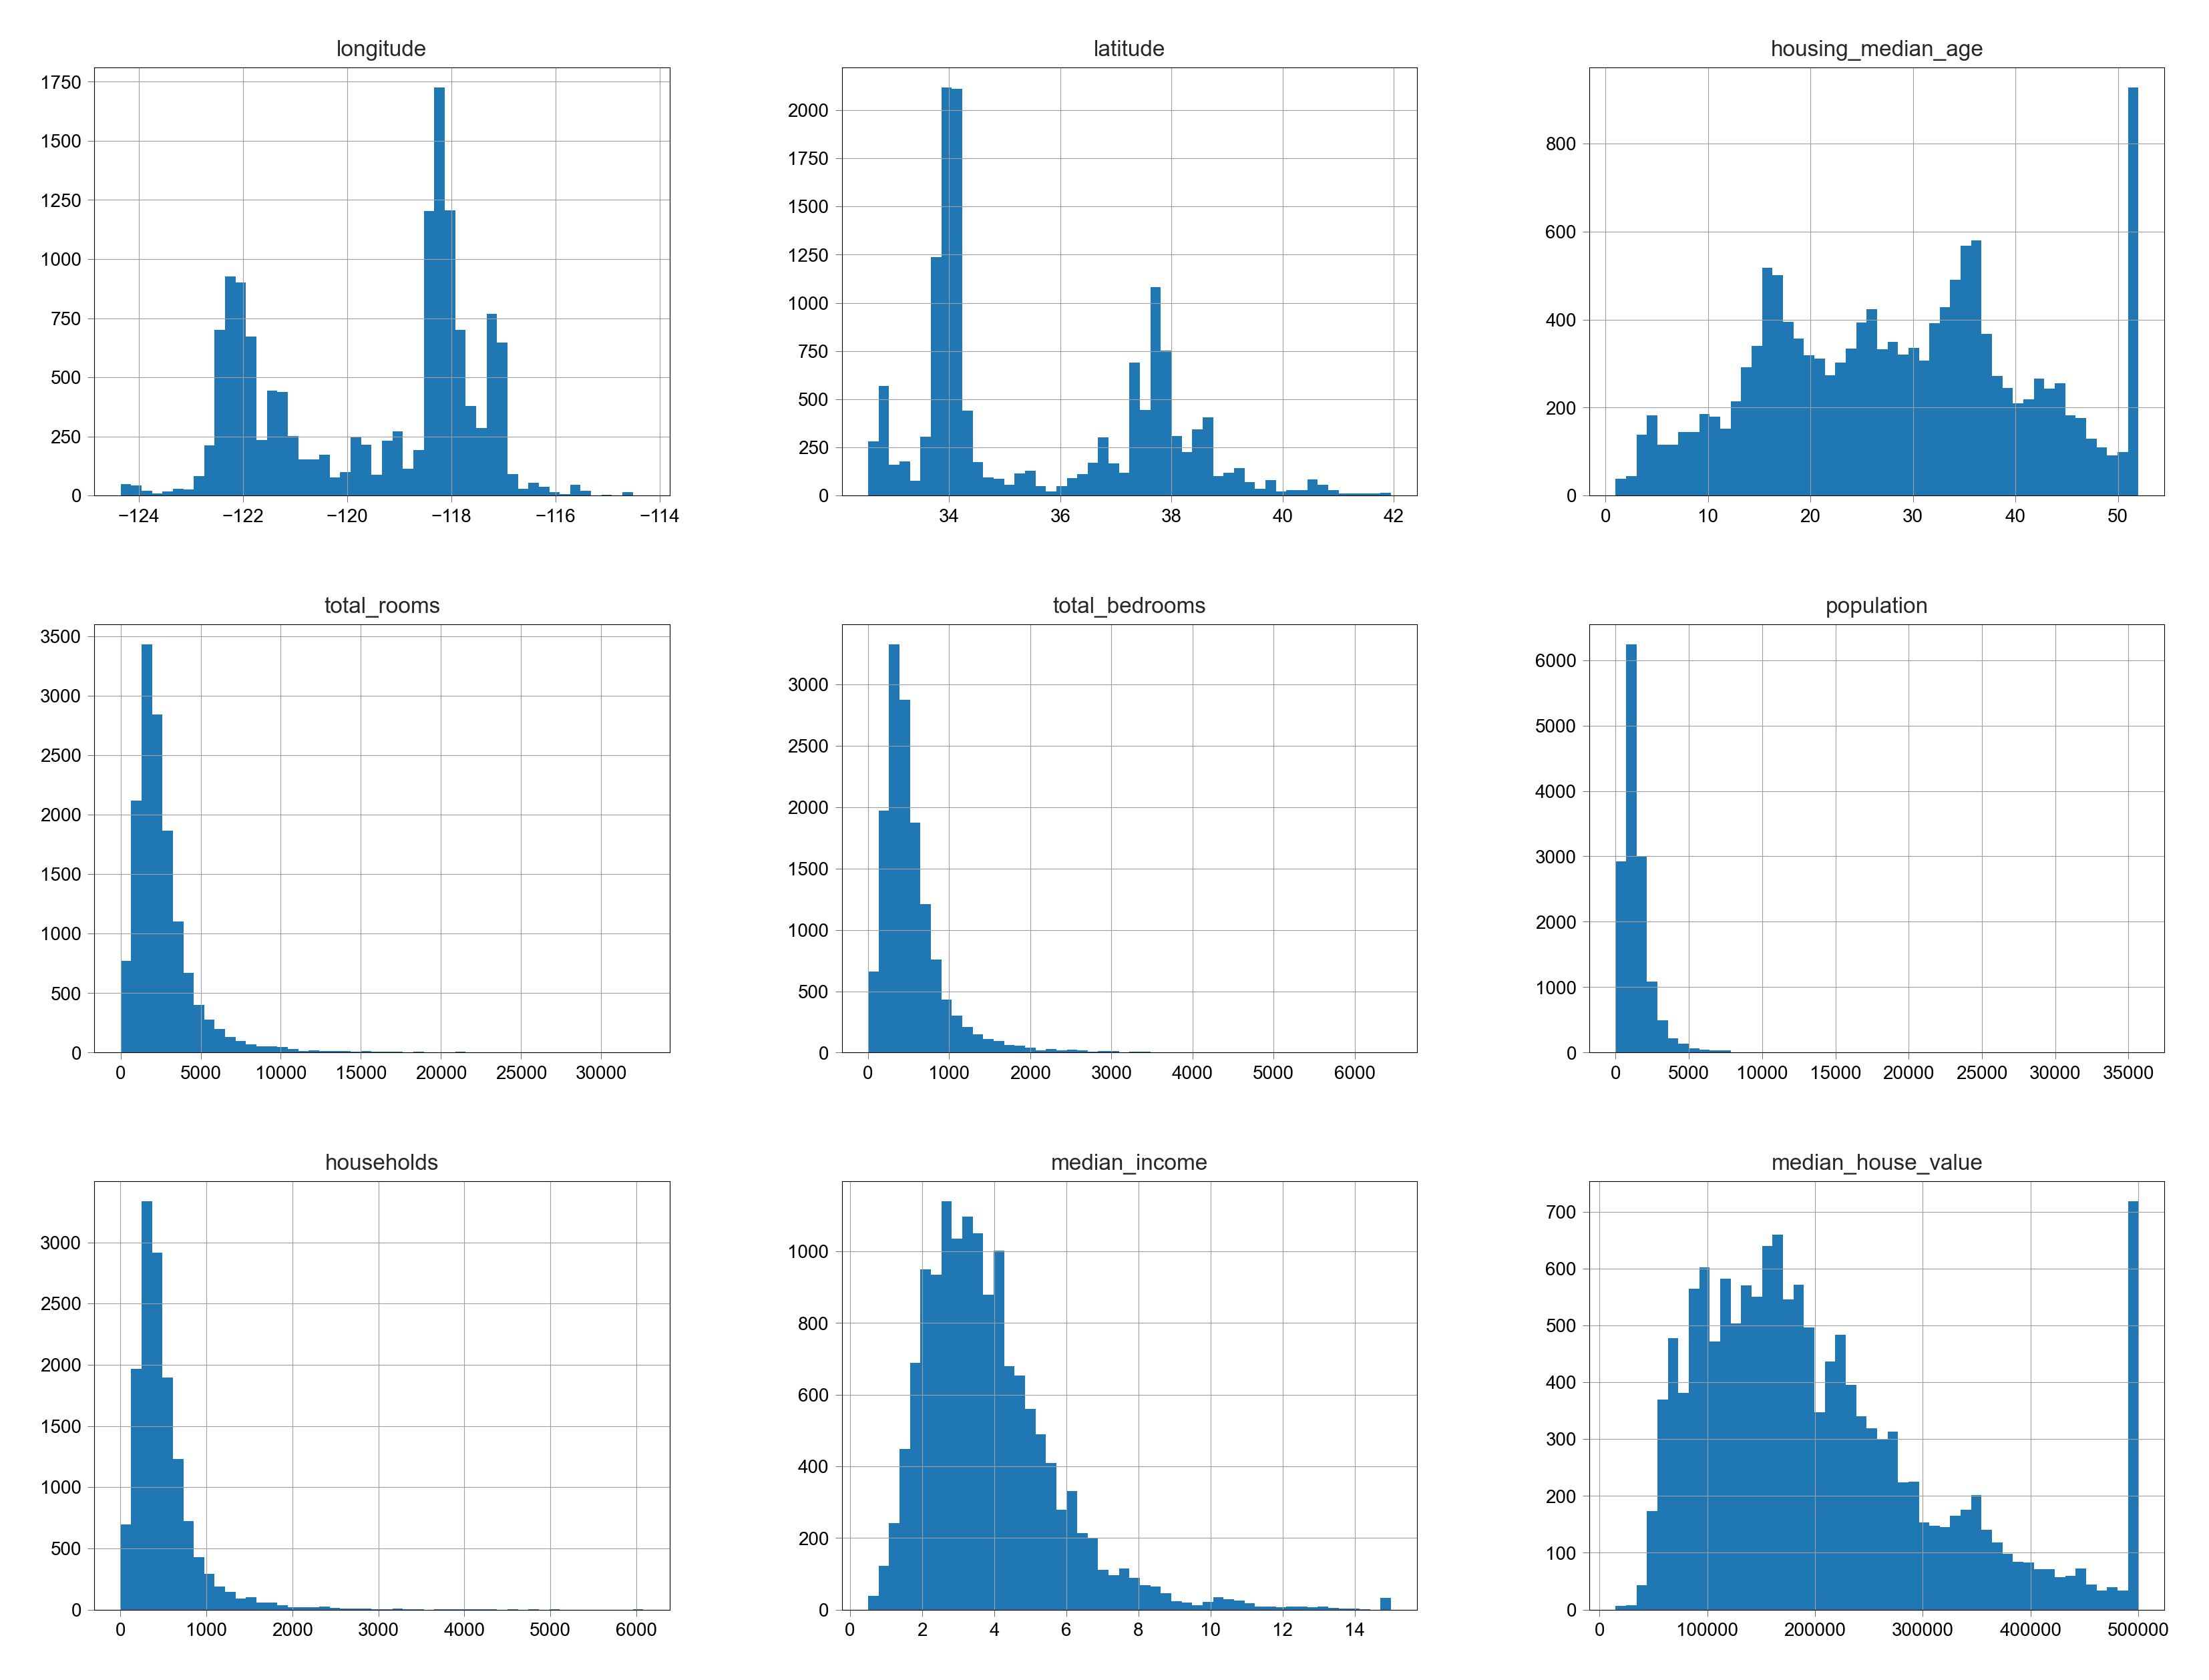

In [20]:
dfc.hist(bins=50, figsize=(20,15))
plt.show()

Dengan tidak memperhatikan fitur latitude & longitude, terdapat sejumlah outliers pada beberapa fitur. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan menghitung IQR dari tiap kolom lalu menentukan batas atas dan batas bawahnya, setelah itu saya akan menghapus outlier yang berada di luar batas untuk mendapatkan 'clean dataset'. Hal ini dilakukan agar hasil prediksi dari model tidak akan menjadi bias.

In [21]:
# Menghitung IQR tiap kolom
Q1 = dfc[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].quantile(0.25)
Q3 = dfc[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah & batas atas untuk outlier
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Menghapus outlier
dfc = dfc[~((dfc[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']] < batas_bawah) | (dfc[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']] > batas_atas)).any(axis=1)]


Hanya 6 fitur yang merupakan numerikal yang saya bersihkan dari outlier, 2 fitur yang merupakan `longitude` & `latitude` tidak saya ikut sertakan dikarenakan 2 fitur ini akan saya drop nanti.

Dalam implementasi ini, metode quantile() digunakan untuk menghitung kuartil pertama dan ketiga (Q1 dan Q3) dari setiap fitur. IQR kemudian dihitung sebagai selisih antara Q3 dan Q1. Batas bawah dan atas untuk outlier didefinisikan sebagai Q1 - 1,5 * IQR dan Q3 + 1,5 * IQR. Setiap data yang berada di luar batas-batas ini dihapus dari DataFrame menggunakan metode any().

**Feature Selection**

In [22]:
# Membuat fitur baru
dfc['rooms_per_household'] = dfc['total_rooms'] / dfc['households']
dfc['bedrooms_per_room'] = dfc['total_bedrooms'] / dfc['total_rooms']
dfc['population_per_household'] = dfc['population'] / dfc['households']

# Drop fitur yang tidak relevan
dfc = dfc.drop(['total_rooms', 'total_bedrooms', 'population', 'households', 'longitude', 'latitude'], axis=1)

Saya membuat 3 fitur baru yaitu :  

- `rooms_per_household` = Fitur ini mewakili jumlah kamar per rumah tangga, yang dapat memberikan indikasi yang lebih baik tentang ukuran setiap rumah.  
- `bedrooms_per_room` = Fitur ini mewakili rasio jumlah kamar tidur dengan jumlah kamar, yang dapat memberikan wawasan tentang tata letak keseluruhan rumah. 
- `population_per_household` = Fitur ini mewakili jumlah orang per rumah tangga, yang dapat memberikan wawasan tentang kepadatan daerah dan kondisi hidup secara keseluruhan.  

Fitur-fitur di atas dapat dibuat dengan cara membagi kolom yang sesuai dengan kolom lain yang relevan.

Setelah membuat 3 fitur baru, saya drop 4 fitur lama yang sudah tidak lagi relevan, fitur tersebut adalah : `longitude`, `latitude`, `total_rooms`, `total_bedrooms`, `population`, dan `households`

**Clean Dataset**

In [23]:
# Cek dataset yang sudah dibersihkan 
dfc.head()

,housing_median_age,median_income,ocean_proximity,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,52.0,1.9750,INLAND,47500.0,2.800000,0.250000,4.825000
1,43.0,2.2604,NEAR BAY,100000.0,3.671480,0.322517,3.018051
2,17.0,6.2990,<1H OCEAN,285800.0,6.478022,0.167939,3.810440
4,50.0,2.2206,INLAND,59200.0,4.622754,0.251295,3.628743
7,17.0,5.2586,INLAND,137000.0,6.945035,0.162880,3.207447


In [24]:
# Cek kembali info dataset
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12616 entries, 0 to 14447
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        12616 non-null  float64
 1   median_income             12616 non-null  float64
 2   ocean_proximity           12616 non-null  object 
 3   median_house_value        12616 non-null  float64
 4   rooms_per_household       12616 non-null  float64
 5   bedrooms_per_room         12616 non-null  float64
 6   population_per_household  12616 non-null  float64
dtypes: float64(6), object(1)
memory usage: 788.5+ KB


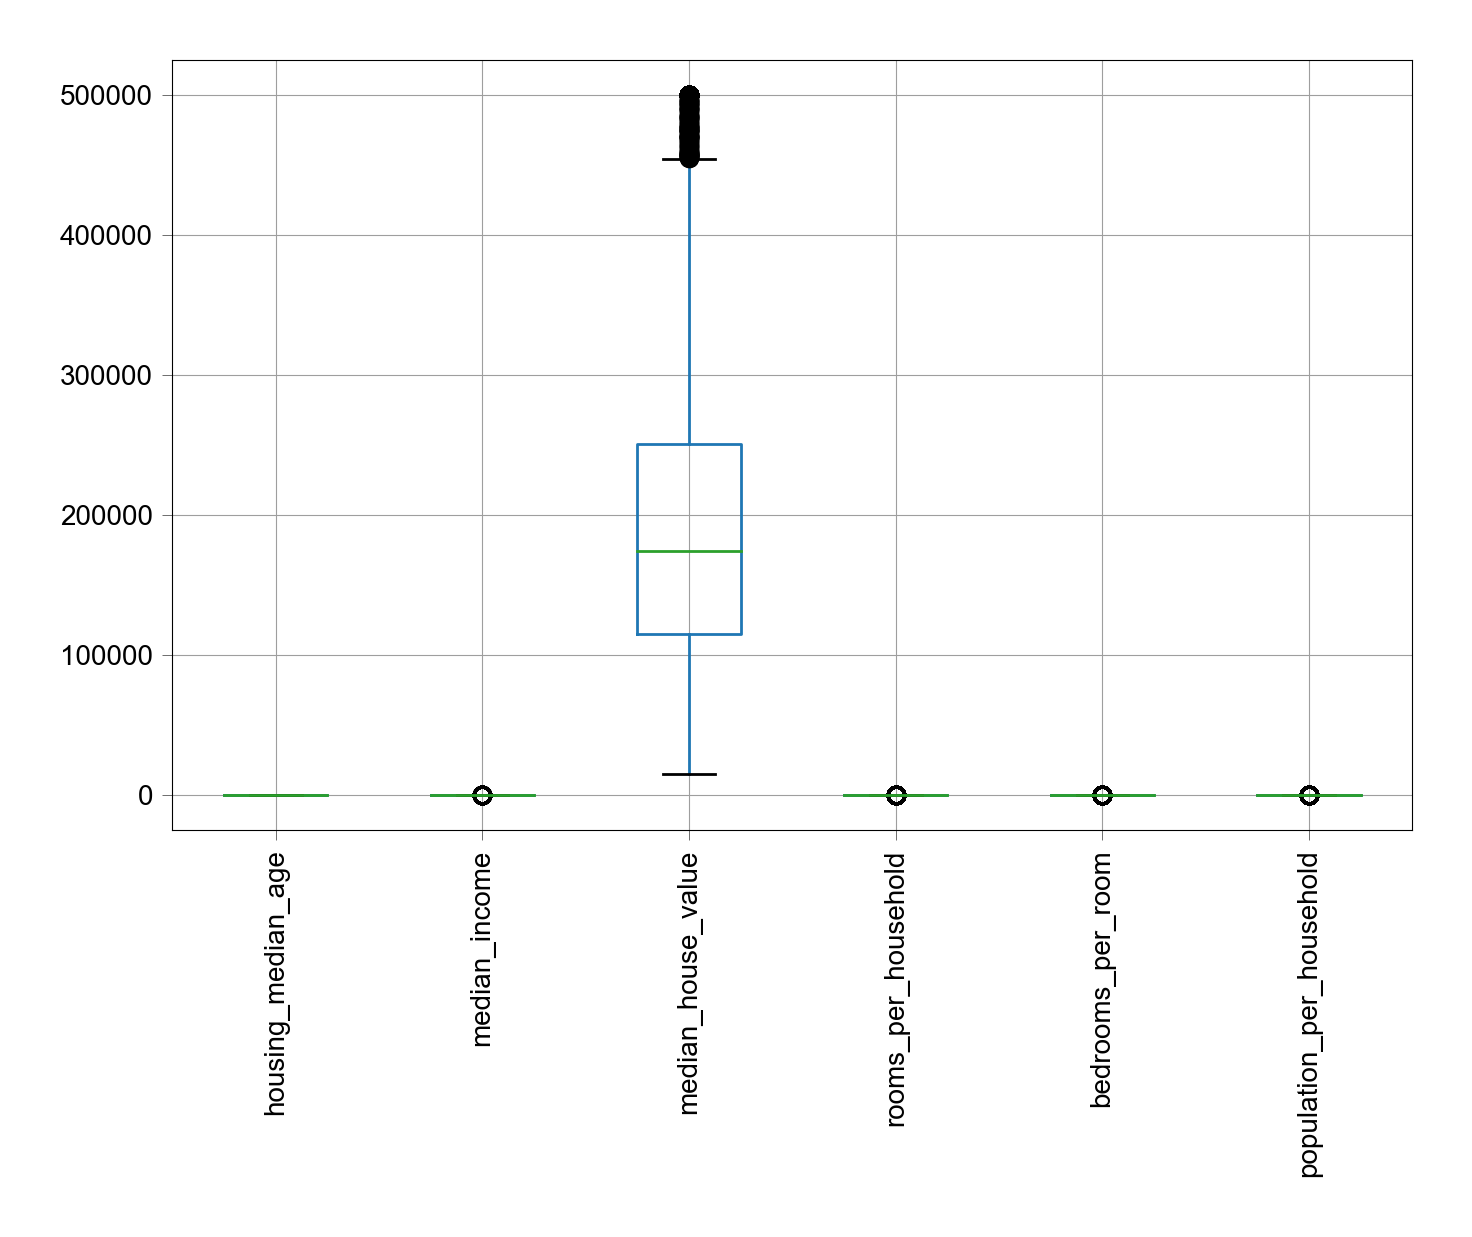

In [47]:
# Plot boxplot data yang sudah bersih
dfc.boxplot(rot=90);

Setelah melakukan proses preprocessing & feature selection, tersisa 12616 baris data dan 6 fitur yang akan digunakan untuk pemodelan. 

# Modelling

**Transformer**

**Encoding**

Terdapat 1 fitur kategorikal dalam dataset saya yaitu `ocean_proximity`, untuk dapat menggunakannya saya akan mengubahnya menjadi fitur numerikal. Fitur `ocean_proximity` tidak memiliki tingkatan yang jelas, oleh karena itu saya akan menggunakan OneHotEncoder. Saya akan menggunakan column transformer untuk mengubah tipe datanya, yang nanti akan diaplikasikan pada pipeline model. 

**Scaling**

Pada 5 fitur lainnya yang merupakan fitur numerikal, saya akan menggunakan scaling. Karena saya sudah melakukan pembersihan terhadap outlier yang ada pada dataset saya, saya akan menggunakan StandardScaler.

In [25]:
# Menentukan kolom transformer
transformer = ColumnTransformer([
    ('OHE', OneHotEncoder(drop='first'), ['ocean_proximity']),
    ('scaler', StandardScaler(), ['median_income', 'housing_median_age', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(drop='first'),
                                 ['ocean_proximity']),
                                ('scaler', StandardScaler(),
                                 ['median_income', 'housing_median_age',
                                  'rooms_per_household', 'bedrooms_per_room',
                                  'population_per_household'])])

**Data Splitting**

In [26]:
# Memisahkan data independen variabel dengan target dan splitting data training & test dengan proporsi 80:20
X = dfc.drop('median_house_value', axis=1)
y = dfc['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Choose A Benchmark Model**

In [27]:
# Menentukan algoritma yang digunakan
models = [
    LinearRegression(),
    DecisionTreeRegressor(random_state=1),
    RandomForestRegressor(random_state=1),
    GradientBoostingRegressor(),
    SVR(),
    BayesianRidge(),
    KNeighborsRegressor(),
    XGBRegressor(random_state=1)
]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-69913.72689266 -68750.99939548 -65789.30982026 -71015.45342043
 -66355.44961291] LinearRegression()
[-49513.70276282 -48516.86308426 -47424.47404125 -51255.14269549
 -48660.65095414] LinearRegression()
[-0.29752612 -0.28626655 -0.28311494 -0.30599651 -0.28114045] LinearRegression()
[-84647.95011626 -87289.59961034 -82656.0956866  -85330.39736406
 -84400.36529175] DecisionTreeRegressor(random_state=1)
[-58017.37939574 -60789.1867261  -57416.44103072 -58159.45143707
 -58760.88553023] DecisionTreeRegressor(random_state=1)
[-0.34308539 -0.34317007 -0.33618884 -0.33585825 -0.33264414] DecisionTreeRegressor(random_state=1)
[-61435.95841128 -62351.70611512 -59240.25727248 -63059.70008811
 -59621.0139466 ] RandomForestRegressor(random_state=1)
[-43252.88860822 -43357.16587915 -41555.53148167 -43963.66851833
 -42393.47497522] RandomForestRegressor(random_state=1)
[-0.25722223 -0.25005516 -0.24397957 -0.25925891 -0.2443285 ] RandomForestRegressor(random_state=1)
[-61934.96867557 -62330.7996742

In [28]:
# Membuat dictionary untuk menampung hasil
results_dict = {
    'Model': ['Linear Regression', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'SVR', 'Bayesian Ridge', 
              'K-Nearest Neighbors', 'XGBRegressor'],
    'RMSE_mean': nilai_mean_rmse,
    'RMSE_std': nilai_std_rmse,
    'MAE_mean': nilai_mean_mae,
    'MAE_std': nilai_std_mae,
    'MAPE_mean': nilai_mean_mape,
    'MAPE_std': nilai_std_mape
}

# Membuat dataframe dari dictionary
results_df = pd.DataFrame(results_dict)

# Print dataframe
results_df

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,MAPE_mean,MAPE_std
0,Linear Regression,-68364.987828,2012.209060,-49074.166708,1276.942967,-0.290809,0.009477
1,Decision Tree,-84864.881614,1499.168585,-58628.668824,1161.779222,-0.338189,0.004218
2,Random Forest,-61141.727167,1493.813754,-42904.545893,840.116849,-0.250969,0.006350
3,Gradient Boosting,-61370.465733,1542.661294,-43436.888117,1004.467533,-0.255032,0.007850
4,SVR,-107831.192935,960.891063,-80876.233754,1013.183654,-0.512186,0.015919
5,Bayesian Ridge,-68373.011858,1988.513747,-49077.279030,1263.359135,-0.290875,0.009437
6,K-Nearest Neighbors,-64187.856311,1603.611222,-44466.689307,1113.599328,-0.255513,0.009170
7,XGBRegressor,-62318.010028,1489.372875,-43427.550722,915.746130,-0.253272,0.007230


Dataframe ini menunjukkan hasil skor cross-validation untuk setiap model regresi yang diuji menggunakan tiga metrik: RMSE, MAE, dan MAPE. Untuk setiap model, dataframe menunjukkan rata-rata dan standar deviasi dari skor untuk setiap metrik. Skor yang lebih rendah menunjukkan kinerja yang lebih baik, sehingga kita dapat membandingkan model dengan melihat skor rata-ratanya.

Berdasarkan skor RMSE rata-rata, model Random Forest memiliki hasil terbaik dengan skor -61141.727167, diikuti oleh model XGBRegressor dengan skor -62318.010028. Model SVR memiliki skor RMSE terburuk dengan rata-rata -107831.192935.

Untuk metrik MAE, model Random Forest kembali memiliki performa terbaik dengan skor rata-rata -42904.545893, diikuti oleh model XGBRegressor dengan skor -43427.550722. Model SVR memiliki skor MAE terburuk dengan rata-rata -80876.233754.

Untuk metrik MAPE, performa terbaik diperoleh oleh model Random Forest dengan skor rata-rata -0.250969.

Secara keseluruhan, model Random Forest dan XGBRegressor tampaknya menjadi model dengan kinerja terbaik berdasarkan skor rata-rata untuk ketiga metrik.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [29]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,61107.364000,43268.724790,0.256931
RandomForest,59625.981699,42462.697579,0.250496


Ketika dilakukan prediksi pada test set, performa Random Forest secara keseluruhan (dari nilai RMSE, MAE, MAPE) sedikit lebih baik dari XGB.

**Hyperparameter Tuning**

Karena model Random Forest memiliki performa yang sedikit lebih baik dari XGB, maka selanjutnya kita akan menggunakan model Random Forest ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model Random Forest dengan harapan dapat meningkatkan performa model.

In [30]:
# Mencari parameter terbaik dari class yang diimpor dari library jcopml.tuning
gsp.rf_params

{'algo__n_estimators': [100, 150, 200],
 'algo__max_depth': [20, 50, 80],
 'algo__max_features': [0.3, 0.6, 0.8],
 'algo__min_samples_leaf': [1, 5, 10]}

In [31]:

rf = RandomForestRegressor(random_state=1)

param_grid = {'model__n_estimators': [100, 150, 200],
              'model__max_depth': [20, 50, 80],
              'model__max_features': [0.3, 0.6, 0.8],
              'model__min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(
    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', rf)
    ]),
    param_grid = param_grid,
    cv = 5,
    scoring = 'neg_mean_absolute_percentage_error',
    n_jobs = -1
)

# Fitting data training untuk mencari parameter terbaik
grid_search.fit(X_train, y_train)

# Print parameter terbaik dan hasil skor
print('Best Parameters: ', grid_search.best_params_)
print('Best Score: ', grid_search.best_score_)

Best Parameters:  {'model__max_depth': 20, 'model__max_features': 0.6, 'model__min_samples_leaf': 5, 'model__n_estimators': 150}
Best Score:  -0.24398384000003878


Parameter terbaik `gridsearch.best_params_`

{'model__max_depth': 20, 'model__max_features': 0.6, 'model__min_samples_leaf': 5, 'model__n_estimators': 150}

Hyperparameter ini dapat digunakan untuk melatih model Random Forest pada dataset yang diberikan. Kinerja model dapat dievaluasi menggunakan metrik evaluasi yang sesuai untuk menentukan seberapa baik model dapat membuat prediksi pada data baru yang belum pernah dilihat sebelumnya.

**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model Random Forest dan hyperparameter terpilih.

In [32]:
# Model Random Forest
model = {'RandomForest': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = grid_search.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,59127.017656,42109.933893,0.248569


**Performance Comparison**

Perbandingan performa model Random Forest sebelum dan sesudah dilakukan hyperparameter tuning.

In [51]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,MAPE
RandomForest,59625.981699,42462.697579,0.250496


In [34]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,59127.017656,42109.933893,0.248569


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 61107, 43268, 0.256931
- RMSE, MAE & MAPE setelah tuning: 59127, 42109, 0.248569

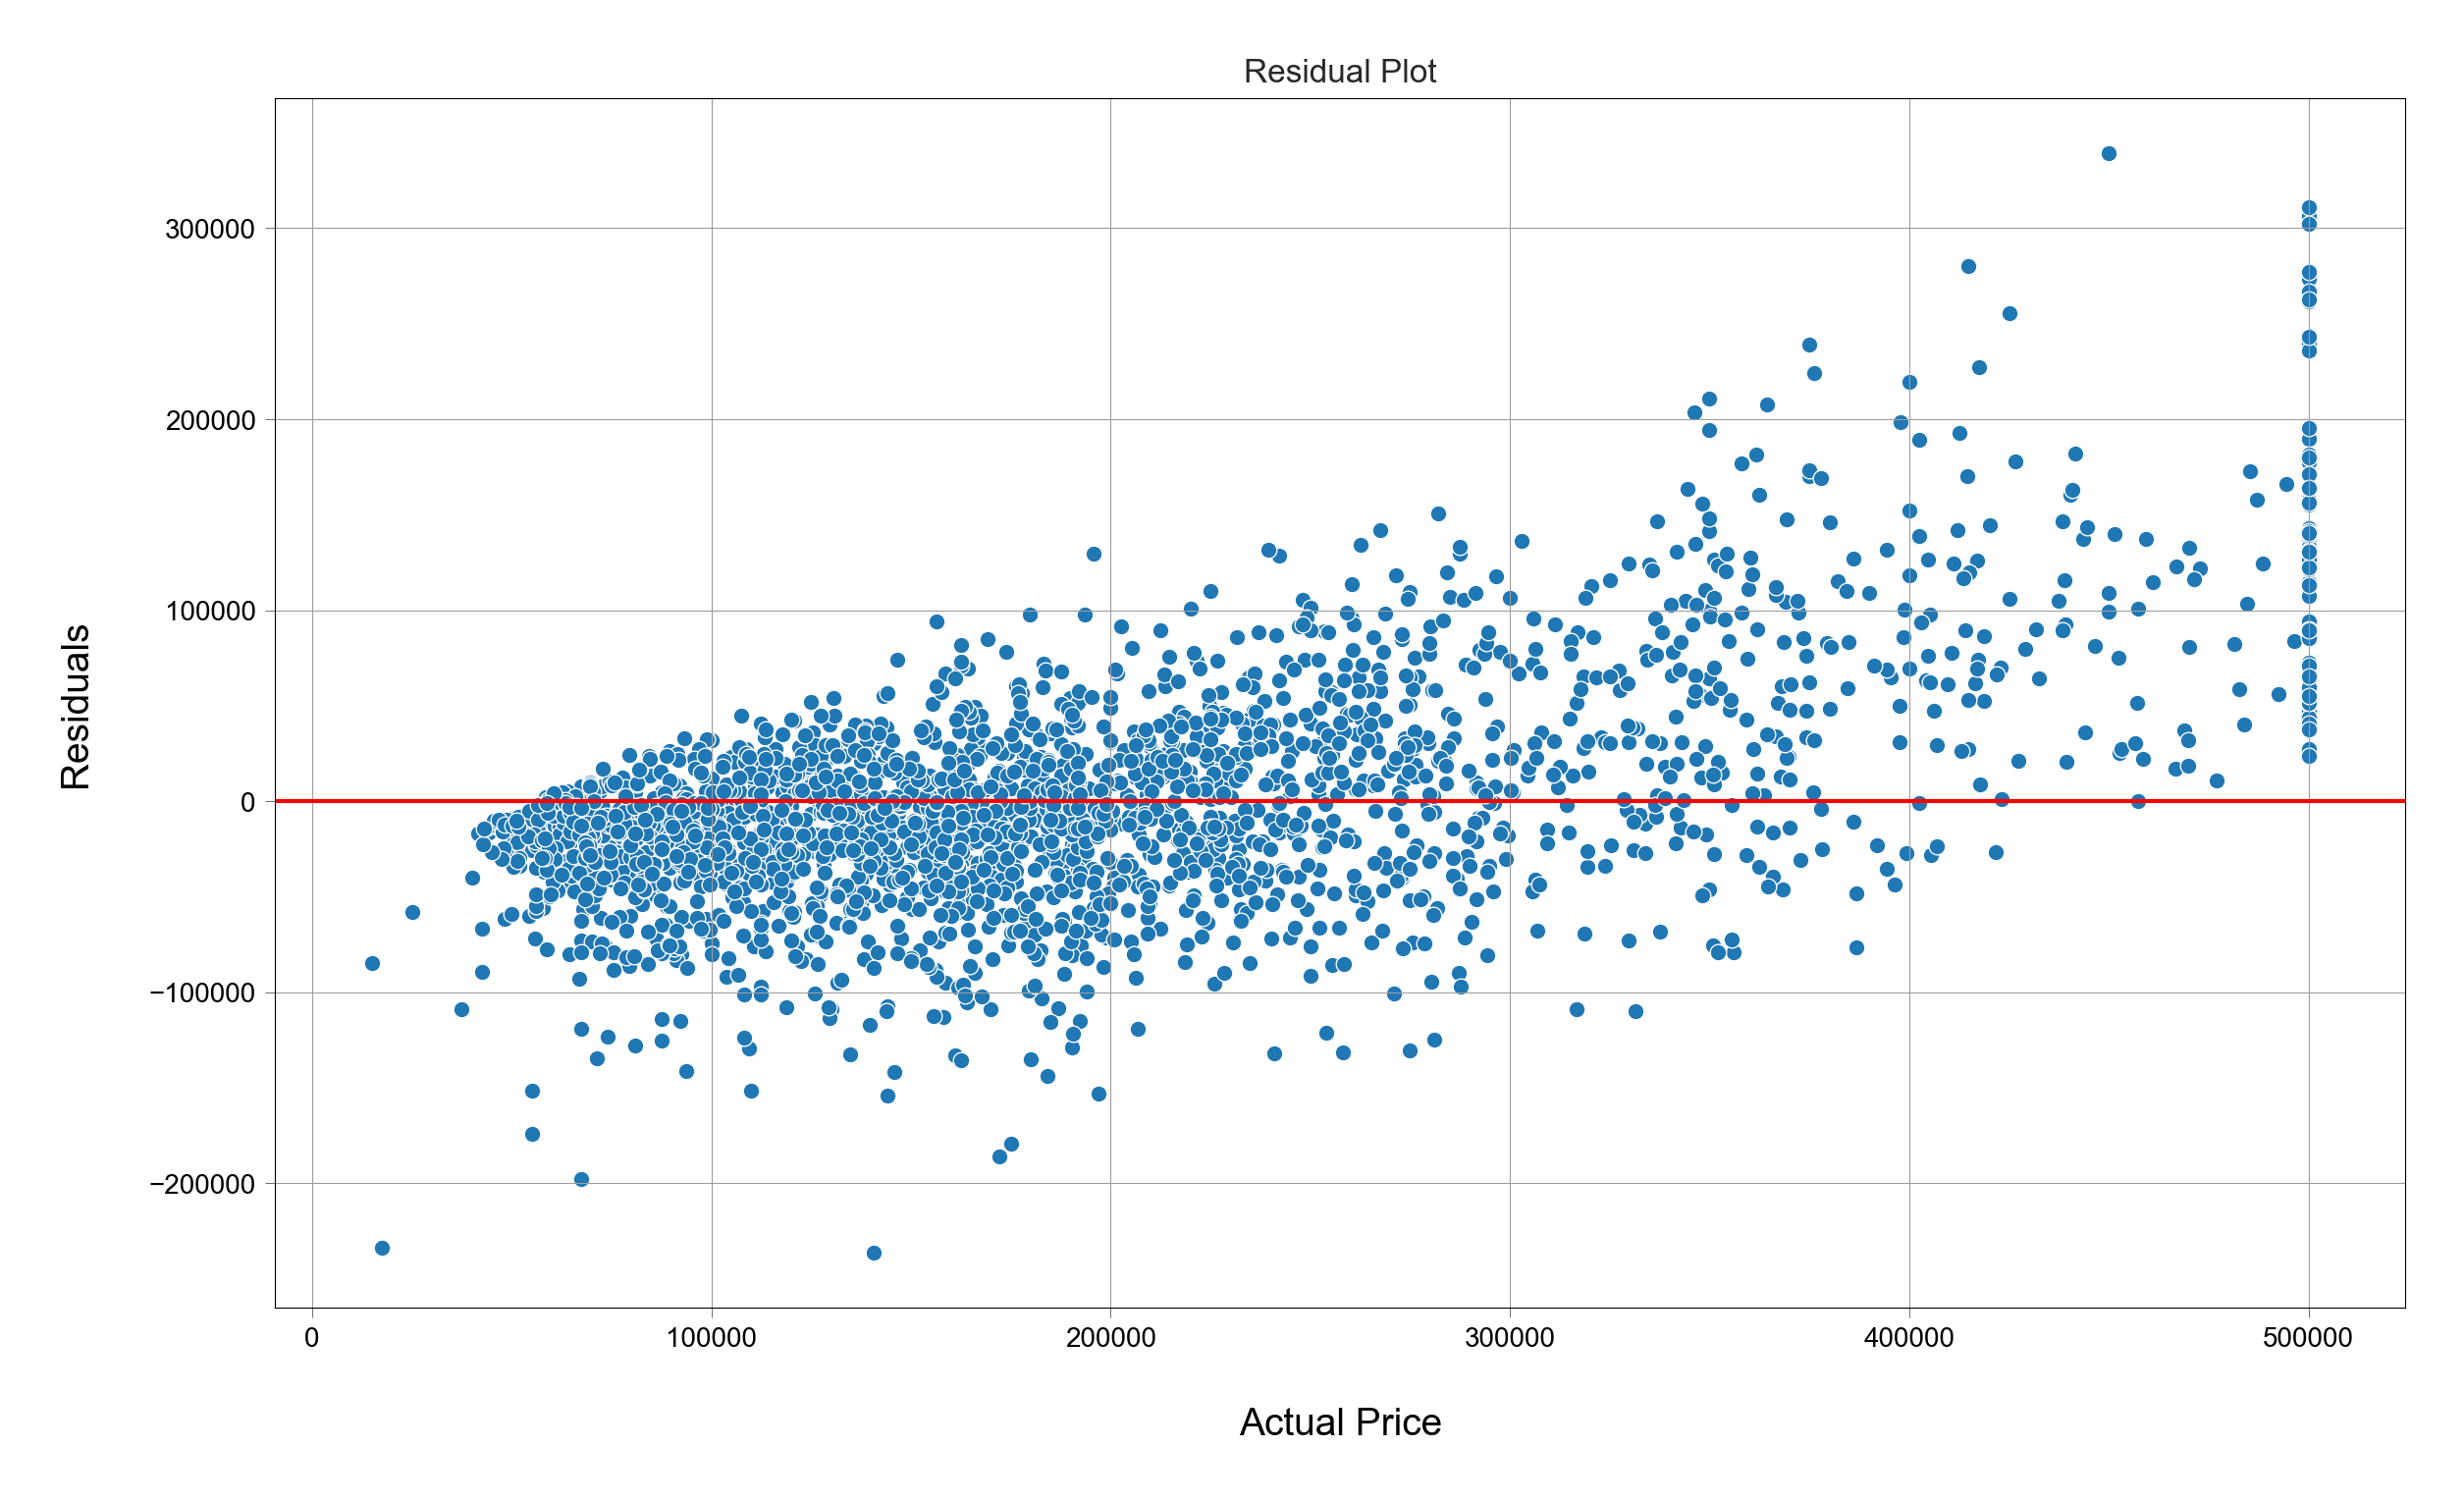

In [39]:
plt.figure(figsize=(14, 8))
y_pred_rf_tuning = rf_tuning.predict(X_test)
residuals = y_test - y_pred_rf_tuning
plot = sns.scatterplot(x=y_test, y=residuals).set(title='Residual Plot', 
                                                 xlabel='Actual Price', 
                                                 ylabel='Residuals')
plt.axhline(y=0, color='red');

Terdapat beberapa nilai-nilai error yang cukup besar tetapi tidak berjumlah sangat banyak. Kebanyakan dari nilai-nilai mempunyai error/miss yang sedikit, membuat adanya perbedaan antara nilai RMSE dan MAE. Pada plot di atas, terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, perbedaan harganya tidak sangat signifikan, banyak harga prediksi yang sudah mendekati harga aktualnya. Nilai MAPE yang didapat, yaitu sekitar 25% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (median_house_value), kita dapat mengeceknya melalui function feature_importances_.

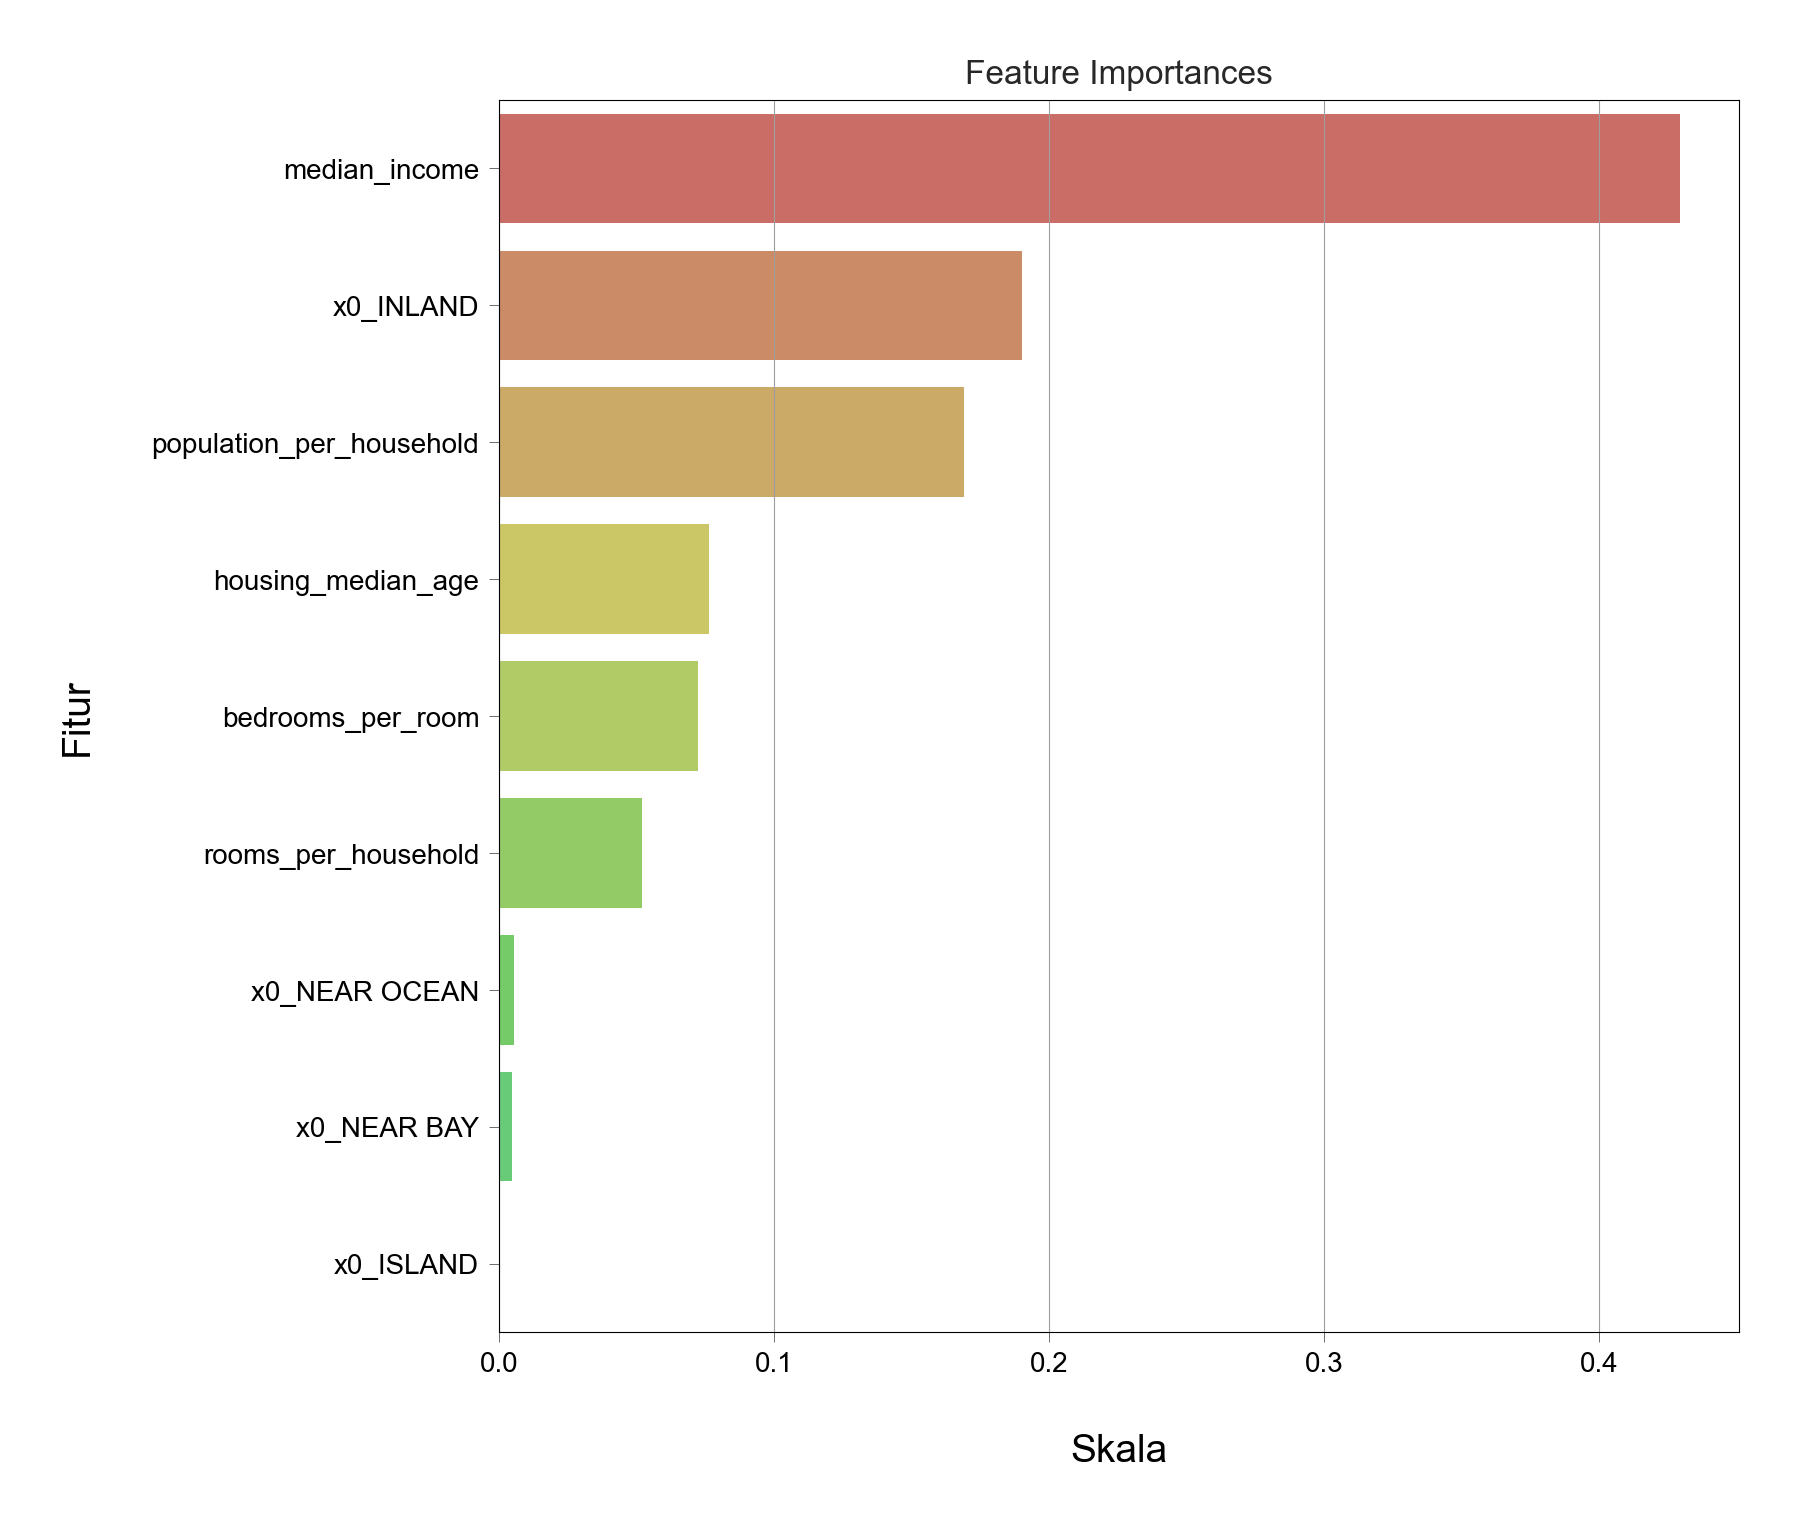

In [37]:
# Plot feature importances
transformed_feature_names = list(transformer.named_transformers_['OHE'].get_feature_names())
feature_names = transformed_feature_names + ['median_income', 'housing_median_age', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, feature_names).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8,8))
bar2 = sns.barplot(x=feature_imp, y=feature_imp.index,
                   palette=sns.hls_palette(n_colors=20), ax=ax)
bar2 = ax.set(xlabel='Skala', ylabel='Fitur', title='Feature Importances')

# Conclusion

Setelah melakukan proses Machine Learning Model di atas, kita dapat menyimpulkan bahwa :  

- Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE.  

- Saya menggunakan 8 algoritma untuk melakukan cross validation : LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, SVR, BayesianRidge, KNeighborsRegressor, dan XGBRegressor.  

- Model yang dipilih adalah Random Forest Regressor dilihat dari hasil cross-val MAPE, dikarenakan mempunyai error yang paling kecil berupa ~25.6% sebelum tuning dan ~24.8% setelah tuning.  

- Berdasarkan pemodelan yang sudah dilakukan, fitur `median_income` dan `ocean_proximity` menjadi fitur yang paling berpengaruh terhadap `median_house_value`.  

- Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~25%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga perumahan baru di California pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 25% dari harga seharusnya.  

- Tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek properti seperti luas tanah, luas bangunan, fasilitas rumah, daerah perumahan, dan akses transportasi.  

- Ada limitasi pada model saya seperti, model tidak bisa melakukan prediksi apabila harga perumahan di atas 500.000 USD, model yang saya buat juga hanya fokus pada perumahan, bentuk properti lain seperti apartemen, condominium, dan lain-lain tidak dapat diprediksi oleh model saya.

# Recommendation

Ada beberapa rekomendasi yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti :

1. Melihat kembali data predict, data mana saja yang memiliki nilai error yang tinggi, lalu membandingkan feature-feature mana saja yang menyebabkan model menghasilkan error tersebut dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita dapat melakukan training ulang dengan penerapan feature engineering lainnya.
<br><br>   
2. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan target ('median_house_value'), seperti luas tanah & bangunan atau jarak perumahan dengan pusat kota. Selain itu, dataset ini dibuat pada tahun 1990, pembaruan data terkini untuk California Housing Prices dapat mengimprovisasi kapasitas prediksi model ini.
<br><br>   
3. Menambahkan data atau mengimprovisasi data dapat membuat model menjadi lebih baik.
<br><br>   
4. Menggunakan model Machine Learning yang berbeda contohnya Neural Network.

# Save Model

**Import Pickle, Save & Load ML**

In [43]:
# Import library
import _pickle as pickle

# Save model
estimator = Pipeline([
        ('preprocessing', transformer), ('model', RandomForestRegressor())])
estimator.fit(X_train,y_train)

pickle.dump(estimator, open('data_california_house.sav', 'wb'))

# Load model
pickle_capstone3 = 'data_california_house.sav'

loaded_model = pickle.load(open(pickle_capstone3, 'rb'))

In [42]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

59876.63275430279

# **THANK YOU**